# Classificazione supervisionata per mezzo dell'utilizzo di Stochastic Gradient Descent

Segue l'applicazione dell'algoritmo Stochastic Gradient Descent per effettuare Classificazione Supervisionata.

## Di seguito è definita la classe per l'applicazione dell'algoritmo SGD

In [44]:
import numpy as np

# regressione logistica
def compute_gradient_logreg(w, X, y):
    return -y*X/(1+np.exp(y*np.dot(np.transpose(w), X)))

# questa funzione calcola la probabilità d'errore per il classificatore logistico
def compute_classifier_p_err(w, X, y):
    return np.mean(np.sign(np.dot(np.transpose(w), X)).T != y)

# La seguente classe implementa l'algoritmo SGD con constant step-size e calcola
# il gradiente stocastico usando un singolo sample come input
class StochasticGradientDescent:
    def __init__(self, learning_rate=0.01):
        self.lr = learning_rate
        self.is_constant = True
        self.betas = None

    # Esecuzione dell'algoritmo SGD su tutti i campioni
    def run_sgd(self, X, y):
        n_features, n_iters = X.shape
        # inizializzazione del vettore di Beta
        self.betas = np.zeros((n_features, n_iters))
        # iterazione sui campioni
        for i in range(1,n_iters):
            grad = compute_gradient_logreg(self.betas[:,i-1].reshape(-1,1), X[:,i].reshape(-1,1), y[i]).ravel()
            self.betas[:,i] = self.betas[:,i-1] - self.lr * grad
        return self.betas

### Nella seguente implementazione le beta sono calcolate senza l'ausilio di una tecnica Montecarlo, ci aspettiamo quindi risultati meno precisi di quelli che otterremo nell'implementazione successiva.

Beta ottenute con SGD senza iterazioni montecarlo 
[[1.82962456]
 [0.00800299]]


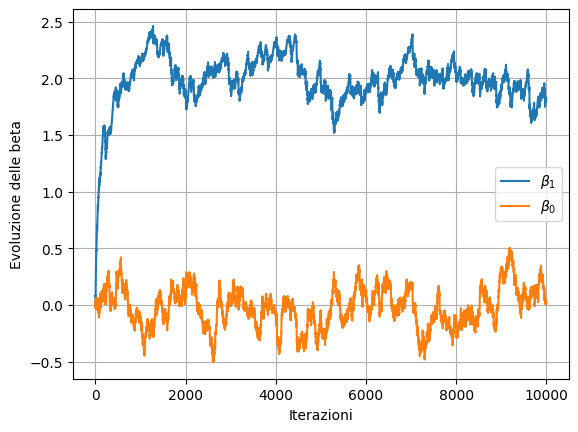

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Definiamo il numero di samples da generare per il dataset di ogni iterazione montecarlo
n_samples = 10000

# Le prior sono equiprobabili
p_pos = 0.5
p_neg = 1 - p_pos

# Definiamo le caratteristiche delle X
n_features = 1
mu_pos = 1
mu_neg = -1
sigma = 1

# Inizializziamo la classe per l'esecuzione dell'algoritmo e la matrice per 
sgd_logreg = StochasticGradientDescent(learning_rate=0.05)
betas_logreg = np.zeros((n_features+1, n_samples))

y = np.random.choice(np.array([-1,1]), (n_samples,1), p=[p_neg, p_pos])
X = np.zeros((n_features,n_samples))
for i in range(n_samples):
    X[:,i] = np.random.normal(mu_pos, sigma) if y[i] == 1 else np.random.normal(mu_neg, sigma)
X = np.vstack((X, np.ones((1,n_samples))))
betas_logreg = sgd_logreg.run_sgd(X,y)


print("Beta ottenute con SGD senza iterazioni montecarlo \n{}".format(betas_logreg[:,-1].reshape(-1,1)))

plt.figure()
plt.plot(betas_logreg[0,:], label=r"$\beta_1$")
plt.plot(betas_logreg[1,:], label=r"$\beta_0$")
plt.xlabel("Iterazioni")
plt.ylabel("Evoluzione delle beta")
plt.legend()
plt.grid(True)
plt.show()

### Nella seguente implementazione le beta sono calcolate per mezzo di una tecnica Montecarlo, ad ogni iterazione viene generato un dataset in accordo alle distribuzioni note e le beta risultanti sono le medie di quelle ottenute con le diverse realizzazioni del dataset.

Beta ottenute con SGD e iterazioni montecarlo 
[[2.02511212]
 [0.004292  ]]


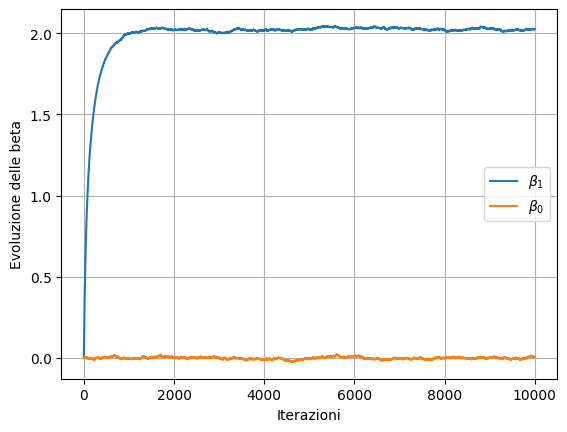

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Definiamo il numero di samples da generare per il dataset di ogni iterazione montecarlo
n_samples = 10000

# Le prior sono equiprobabili
p_pos = 0.5
p_neg = 1 - p_pos

# Definiamo le caratteristiche delle X
n_features = 1
mu_pos = 1
mu_neg = -1
sigma = 1

# Inizializziamo la classe per l'esecuzione dell'algoritmo e la matrice per 
sgd_logreg = StochasticGradientDescent(learning_rate=0.05)
betas_logreg_mc = np.zeros((n_features+1, n_samples))

# Definiamo il numero di iterazioni Montecarlo
n_montecarlo = 500

# A questo punto per ogni iterazione Montecarlo definiamo un dataset ed eseguiamo
# l'algoritmo del gradiente stocastico con constant step-size
for i in range(n_montecarlo):
    y = np.random.choice(np.array([-1,1]), (n_samples,1), p=[p_neg, p_pos])
    X = np.zeros((n_features,n_samples))
    for i in range(n_samples):
        X[:,i] = np.random.normal(mu_pos, sigma) if y[i] == 1 else np.random.normal(mu_neg, sigma)
    X = np.vstack((X, np.ones((1,n_samples))))
    tmp_betas_logreg = sgd_logreg.run_sgd(X,y)
    betas_logreg_mc += tmp_betas_logreg

betas_logreg_mc = betas_logreg_mc/n_montecarlo

print("Beta ottenute con SGD e iterazioni montecarlo \n{}".format(betas_logreg_mc[:,-1].reshape(-1,1)))

plt.figure()
plt.plot(betas_logreg_mc[0,:], label=r"$\beta_1$")
plt.plot(betas_logreg_mc[1,:], label=r"$\beta_0$")
plt.xlabel("Iterazioni")
plt.ylabel("Evoluzione delle beta")
plt.legend()
plt.grid(True)
plt.show()

Notiamo dall'osservazioni dei grafici che mostrano le Beta che grazie alle iterazioni Montecarlo è stato possibile ottenere stime di beta molto meno rumorose

### Di seguito è calcolato il test error utilizzando iterazioni Montecarlo per assicurare una stima più precisa, sono messi a confronto i risultati ottenuti con i beta calcolati senza e con l'ausilio di iterazioni Montecarlo

Stima dell'errore del modello ottenuto senza iterazioni Montecarlo

Probabilità d'errore = 0.15866899999999998
Probabilità di corretta classificazione (accuracy) = 0.841331


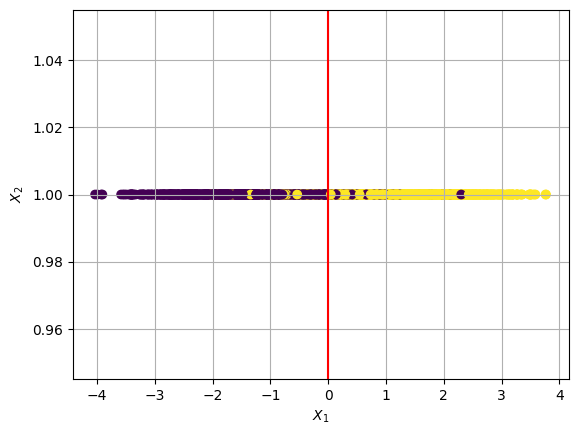

In [47]:
n_montecarlo = 1000
p_err_tmp = 0
for i in range(n_montecarlo):
    n_test = 3000
    y_test = np.random.choice(np.array([-1,1]), (n_test,1), p=[p_neg, p_pos])
    X_test = np.zeros((n_features,n_test))
    for i in range(n_test):
        X_test[:,i] = np.random.normal(mu_pos, sigma) if y_test[i] == 1 else np.random.normal(mu_neg, sigma)
    X_test = np.vstack((X_test, np.ones((1,n_test))))

    p_err_tmp = p_err_tmp + compute_classifier_p_err(betas_logreg[:,-1].reshape(-1,1), X_test, y_test)

p_err = p_err_tmp /n_montecarlo
p_corr = 1-p_err
print("Probabilità d'errore = {}".format(p_err))
print("Probabilità di corretta classificazione (accuracy) = {}".format(p_corr))

# Risulta possibile verificare visivamente che il nostro classificatore ha buone performance mostrando 
# il separatore lineare che lo rappresenta
plt.figure()
plt.scatter(X_test[0,:], X_test[1,:], c=y_test.reshape(-1))
# disegnamo il separatore lineare
x_boundary = -betas_logreg_mc[1, -1] / betas_logreg_mc[0, -1]
plt.axvline(x=x_boundary, color='r', linestyle='-')  # Linea verticale a coordinate x = -beta_0 / beta_1
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")
plt.grid(True)
plt.show()

Stima dell'errore del modello ottenuto con iterazioni Montecarlo

Probabilità d'errore = 0.15847266666666662
Probabilità di corretta classificazione (accuracy) = 0.8415273333333334


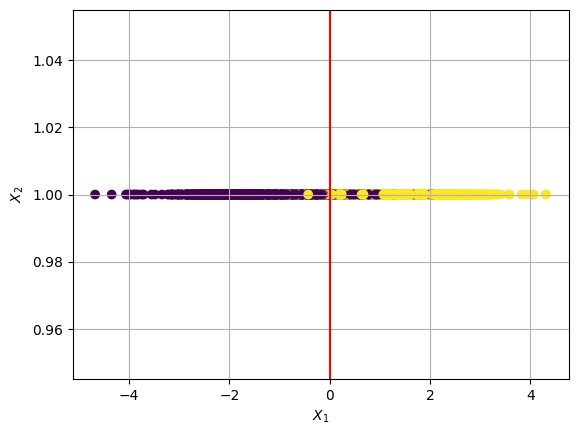

In [48]:
n_montecarlo = 1000
p_err_tmp = 0
for i in range(n_montecarlo):
    n_test = 3000
    y_test = np.random.choice(np.array([-1,1]), (n_test,1), p=[p_neg, p_pos])
    X_test = np.zeros((n_features,n_test))
    for i in range(n_test):
        X_test[:,i] = np.random.normal(mu_pos, sigma) if y_test[i] == 1 else np.random.normal(mu_neg, sigma)
    X_test = np.vstack((X_test, np.ones((1,n_test))))

    p_err_tmp = p_err_tmp + compute_classifier_p_err(betas_logreg_mc[:,-1].reshape(-1,1), X_test, y_test)

p_err = p_err_tmp /n_montecarlo
p_corr = 1-p_err
print("Probabilità d'errore = {}".format(p_err))
print("Probabilità di corretta classificazione (accuracy) = {}".format(p_corr))

# Risulta possibile verificare visivamente che il nostro classificatore ha buone performance mostrando 
# il separatore lineare che lo rappresenta
plt.figure()
plt.scatter(X_test[0,:], X_test[1,:], c=y_test.reshape(-1))
# disegnamo il separatore lineare
x_boundary = -betas_logreg_mc[1, -1] / betas_logreg_mc[0, -1]
plt.axvline(x=x_boundary, color='r', linestyle='-')  # Linea verticale a coordinate x = -beta_0 / beta_1
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")
plt.grid(True)
plt.show()

# Segue l'analisi dei risultati

Tutti i seguenti confronti sono relativi, come richiesto dalla traccia, al caso con varianza più bassa, nello specifico è stata scelta varianza uguale ad 1.

Probabilità d'errore calcolata per il classificatore MAP con modello noto: 0.15843
Probabilità d'errore calcolata per il classificatore ottenuto con SGD con constant step-size senza iterazioni Montecarlo : 0.15866
Probabilità d'errore calcolata per il classificatore ottenuto con SGD con constant step-size con iterazioni Montecarlo : 0.15847

Notiamo che, seppur di poco, la Probabilità d'errore ottenuta con MAP risulta più bassa di quelle ottenute con SGD, sicuramente il fatto che la differenza sia poca è dovuta all'alto numero di campioni che compongono i dataset utilizzati. In una situazione meno "data-rich" la differenza sarebbe stata più pronunciata, MAP avvalendosi dei modelli è il criterio ottimo e privo dei compromessi che nascono dalla dipendenza da un dataset.

Notiamo inoltre che tra le due probabilità d'errore ottenute con SGD è più bassa quella risultante dall'utilizzo delle beta calcolate avvalendosi delle iterazioni Montecarlo, anche questo risultato è in linea con le aspettative. Mediando su più dataset si ottengono risultati meno affetti dalle specifiche caratteristiche che un certo dataset può avere e quindi migliori.